# <font color="red">Linear Regression</font> V/s <font color="red">Support Vector Regression </font> V/s <font color="red">Random Forest Regression</font> 


In [1]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Importing Data

In [2]:
import pandas as pd
from sklearn import preprocessing
bos = pd.DataFrame(boston.data)
print("the raw data from BOSTON DATA SET :")
print(bos.head())
print('**=='*25)


the raw data from BOSTON DATA SET :
         0     1     2    3      4      5     6       7    8      9    10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  
**==**==**==**==**==**==**==**==**==**==**==**==**==**==**==**==**==**==**==**==**==**==**==**==**==


In [3]:
print(boston.data.shape)

(506, 13)


In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

### Data standardization :<a href="https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc">"why to standardize data"</a>

In [6]:
# Get column names first
names = bos.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(bos)
BOS = pd.DataFrame(scaled_df, columns=names)
print("the data after standardization is : ")
print("--"*50)
print(BOS.head(),'\n')
print("-+"*50)

the data after standardization is : 
----------------------------------------------------------------------------------------------------
          0         1         2         3         4         5         6  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

          7         8         9        10        11        12  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501   

-+-+-+-+-+-+-+-+-+-+-+-+-

In [7]:
BOS['PRICE'] = boston.target
X = BOS.drop('PRICE', axis = 1)
Y = BOS['PRICE']
print(Y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size = 0.33, random_state = 5)
print('the train data is of dimension')
print(X_train.shape,Y_train.shape)
print('the test data is of dimension')
print(X_test.shape,Y_test.shape)
print()


the train data is of dimension
(339, 13) (339,)
the test data is of dimension
(167, 13) (167,)



In [9]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

<Figure size 640x480 with 1 Axes>

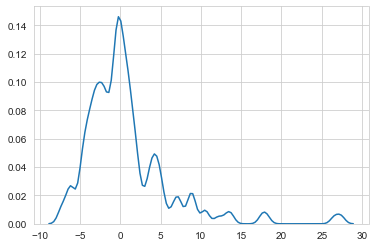

In [10]:
delta_y = Y_test - Y_pred;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()


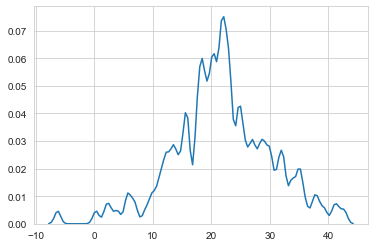

In [11]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(Y_pred), bw=0.5)
plt.show()

In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
MAE_LR=mean_absolute_error(Y_test,Y_pred)
MSE_LR=mean_squared_error(Y_test,Y_pred)
r2_LR=r2_score(Y_test,Y_pred)
print('the mean abs error is :   ', MAE_LR)
print('the mean squared error is :   ',MSE_LR)
print('the goodness of fit is :   ',r2_LR)

the mean abs error is :    3.4550349322483522
the mean squared error is :    28.530458765974625
the goodness of fit is :    0.6956551656111603


In [13]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

model=SVR()
parameters = {'C':[0.0001, 0.001, 0.01, 0.1,1,10,100,1000,10000],'epsilon':[0.01,0.1,1,10]}
clf=GridSearchCV(model,parameters,cv=3, scoring='r2',return_train_score=True,n_jobs=-1)
clf.fit(X_train,Y_train)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'epsilon': [0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=0)

In [14]:
clf.best_estimator_


SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_epsilon,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.053302,0.015998,0.003999,8.153679e-04,0.0001,0.01,"{'C': 0.0001, 'epsilon': 0.01}",-0.003223,-0.061736,-0.009756,-0.024905,0.026180,35,-0.011338,-0.015676,-0.031249,-0.019421,0.008549
1,0.011992,0.002828,0.006662,3.855992e-03,0.0001,0.1,"{'C': 0.0001, 'epsilon': 0.1}",-0.002676,-0.061753,-0.008782,-0.024403,0.026527,34,-0.010425,-0.015685,-0.029305,-0.018472,0.007956
2,0.011328,0.001249,0.003998,8.178981e-04,0.0001,1,"{'C': 0.0001, 'epsilon': 1}",-0.004981,-0.064620,-0.007811,-0.025804,0.027471,36,-0.014068,-0.017143,-0.027318,-0.019510,0.005662
3,0.010667,0.000937,0.002992,8.222808e-04,0.0001,10,"{'C': 0.0001, 'epsilon': 10}",-0.015945,-0.001479,-0.016716,-0.011380,0.007008,30,-0.003361,-0.006370,-0.006077,-0.005270,0.001355
4,0.017321,0.002064,0.004327,1.250874e-03,0.001,0.01,"{'C': 0.001, 'epsilon': 0.01}",-0.000785,-0.060103,-0.007215,-0.022701,0.026577,32,-0.008762,-0.013556,-0.028461,-0.016926,0.008388
5,0.020656,0.012279,0.004996,8.180935e-04,0.001,0.1,"{'C': 0.001, 'epsilon': 0.1}",-0.000243,-0.060267,-0.006646,-0.022386,0.026914,31,-0.007868,-0.013639,-0.027330,-0.016279,0.008162
6,0.010990,0.001636,0.003331,4.718778e-04,0.001,1,"{'C': 0.001, 'epsilon': 1}",-0.002667,-0.063351,-0.005619,-0.023879,0.027937,33,-0.011672,-0.015266,-0.025151,-0.017363,0.005699
7,0.011336,0.002482,0.006320,2.629823e-03,0.001,10,"{'C': 0.001, 'epsilon': 10}",-0.015055,-0.000535,-0.016028,-0.010539,0.007085,29,-0.002359,-0.005469,-0.005385,-0.004404,0.001447
8,0.018655,0.002865,0.005332,9.409990e-04,0.01,0.01,"{'C': 0.01, 'epsilon': 0.01}",0.023084,-0.038232,0.017002,0.000618,0.027583,25,0.016690,0.009497,-0.002638,0.007850,0.007976
9,0.020320,0.005245,0.006339,2.052734e-03,0.01,0.1,"{'C': 0.01, 'epsilon': 0.1}",0.022909,-0.038810,0.015843,-0.000019,0.027580,26,0.016337,0.009502,-0.004781,0.007019,0.008798


In [16]:
model=SVR(C= 10, epsilon= 0.1)
model.fit(X_train,Y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
Y_pred_s = model.predict(X_test)

****************************************************************************************************
the metrics for SVR are 
the mean abs error is :    2.638775990141505
the mean squared error is :    23.52418790608938
the goodness of fit is :    0.7490588871655619
****************************************************************************************************


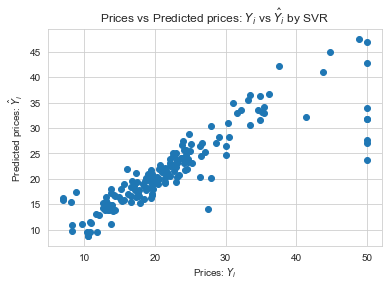

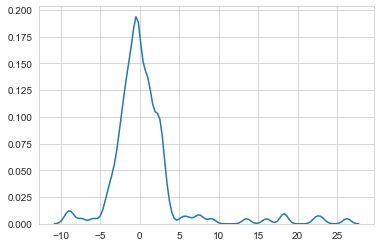

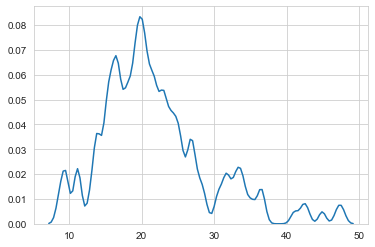

In [18]:
MAE_SVR=mean_absolute_error(Y_test,Y_pred_s)
MSE_SVR=mean_squared_error(Y_test,Y_pred_s)
r2_SVR=r2_score(Y_test,Y_pred_s)

print("*"*100)
print("the metrics for SVR are ")
print('the mean abs error is :   ',  MAE_SVR)
print('the mean squared error is :   ',MSE_SVR)
print('the goodness of fit is :   ',r2_SVR)
print("*"*100)

plt.scatter(Y_test, Y_pred_s)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ by SVR")
plt.show()


delta_y = Y_test - Y_pred_s;

# import seaborn as sns;
# import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()


sns.set_style('whitegrid')
sns.kdeplot(np.array(Y_pred_s), bw=0.5)
plt.show()

In [27]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
parameters = {'n_estimators':[1, 5, 10, 15,20]}
clf=GridSearchCV(model,parameters,cv=3, scoring='r2',return_train_score=True,n_jobs=-1)
clf.fit(X_train,Y_train)


# regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
# regressor.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'n_estimators': [1, 5, 10, 15, 20

In [28]:
clf.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=15,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

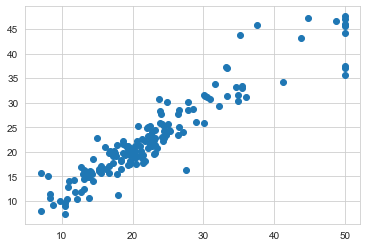

In [29]:
regressor=RandomForestRegressor(n_estimators=15,random_state=0)
regressor.fit(X_train,Y_train)
Y_pred_RF=regressor.predict(X_test)
plt.scatter(Y_test, Y_pred_RF)

MAE_RF=mean_absolute_error(Y_test,Y_pred_RF)
MSE_RF=mean_squared_error(Y_test,Y_pred_RF)
r2_RF=r2_score(Y_test,Y_pred_RF)

Text(0.5, 1.0, 'Random Forest regression with n estimators = 15')

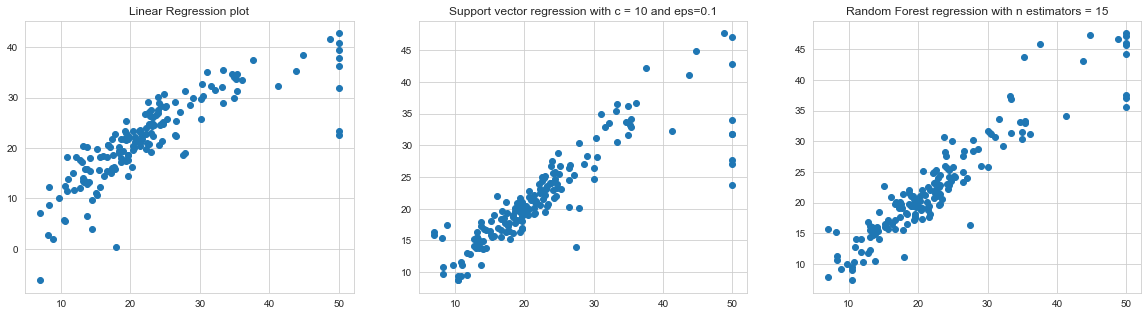

In [47]:
plt.figure(figsize=(20,5))
# for k in range(3):
plt.subplot(1,3, 1)
plt.scatter(Y_test, Y_pred)
plt.title('Linear Regression plot')

plt.subplot(1,3, 2)        
plt.scatter(Y_test, Y_pred_s)
plt.title('Support vector regression with c = {} and eps={}'.format(10,0.1))
plt.subplot(1,3, 3)        
plt.scatter(Y_test, Y_pred_RF)
plt.title('Random Forest regression with n estimators = {}'.format(15))

## Conclusion

In [38]:
from prettytable import PrettyTable
x = PrettyTable(["Model", "Hyper-parameter tuning", "Hyper-parameter" ,"MSE","MAE","r2 Score"])
x.add_row([ "LR","---", "none", round(MSE_LR,4),round(MAE_LR,4),round(r2_LR,4)])
x.add_row(["SVR", "GridSearchCV", {'C': 10, 'epsilon': 0.1},round(MSE_SVR,4),round(MAE_SVR,4),round(r2_SVR,4)])
x.add_row(["Random Forest", "GridSearchCV", {'n_estimators': 15},round(MSE_RF,4),round(MAE_RF,4),round(r2_RF,4)])
print(x)

+---------------+------------------------+---------------------------+---------+--------+----------+
|     Model     | Hyper-parameter tuning |      Hyper-parameter      |   MSE   |  MAE   | r2 Score |
+---------------+------------------------+---------------------------+---------+--------+----------+
|       LR      |          ---           |            none           | 28.5305 | 3.455  |  0.6957  |
|      SVR      |      GridSearchCV      | {'C': 10, 'epsilon': 0.1} | 23.5242 | 2.6388 |  0.7491  |
| Random Forest |      GridSearchCV      |    {'n_estimators': 15}   | 11.5179 | 2.4151 |  0.8771  |
+---------------+------------------------+---------------------------+---------+--------+----------+


<b>SVR is able to perform better than Linear regression</b>. It is very much evident from the reduced error and Goodness of fit for r2 scores.<br>
<b>Random forest regressor out performs the SVR .</b> Not only from the metrics , it is clear from the comparison graphs as we see less better linearity. Random forest is an ensemble method which uses bagging. Many such subsets learn invidually and are able to peform better than standalone models.